<a href="https://colab.research.google.com/github/ShrimanthAM/DATA606Project/blob/main/YOLOv3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### source code repo : https://github.com/AlexeyAB/darknet forked from https://pjreddie.com/darknet/


# YOLOv3 model

# Loading the Darknet

### 1. Clone the Darknet Repo

In [ ]:
#cloning the darknet repository 
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15035, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 15035 (delta 11), reused 17 (delta 6), pack-reused 15002
Receiving objects: 100% (15035/15035), 13.44 MiB | 16.16 MiB/s, done.
Resolving deltas: 100% (10210/10210), done.


### 2.Make changes in the coniguration file to enable GPU and OPENCV

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# looking at CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 3. build darknet - make it executable

In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

### 4. Get Pre-trained weights trained on COCO dataset

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-05-12 03:43:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  21.3MB/s    in 12s     

2021-05-12 03:43:26 (19.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



### 5. Defining functions to display the prediction

In [ ]:
# defining the helping function to display the image


def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


### 6. Run YOLOv3 on sample image

In [ ]:
# running the darknet on an example image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

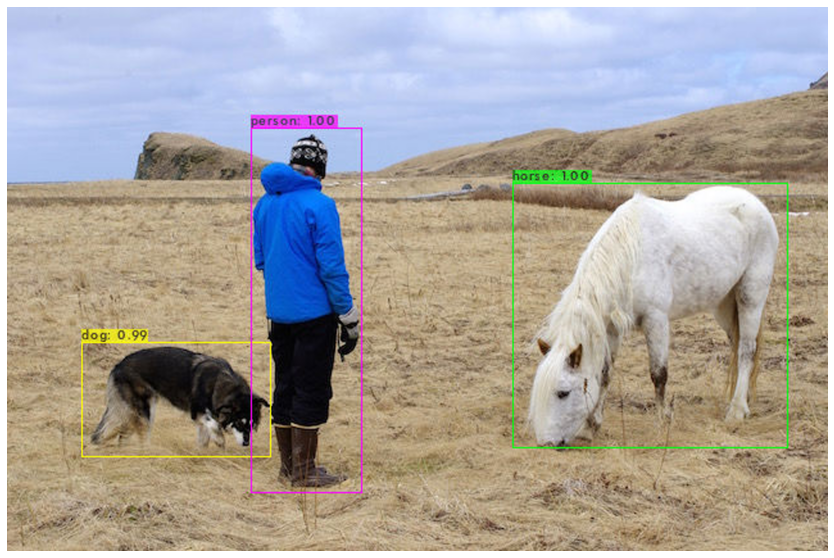

In [ ]:
# displayinig the output image
imShow('predictions.jpg')

# Training the model on my custom data

## Required files 
1. test and train configuration files
2. data zip folder with images and corresponding labels text file
3. data and names file
4. train and val split file

These files have been uploaded to yolov3 google drive folder for easy access

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# creating a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 2009.05451.pdf
'3rd Sem_Fall 2020 '
'5th Main Road 10.m4a'
'602 links.gdoc'
 603_project
'603 Project docs.gdoc'
 Articles.gdoc
'Artificial_Intelligence_for_Big_Data_Complete_Guid..._----_(Chapter_12_Cognitive_Computing).pdf'
'Artificial_Intelligence_for_Big_Data_Complete_Guid..._----_(Other_Books_You_May_Enjoy).pdf'
'August 2020.gdoc'
'August 2020.pdf'
'AWS Cloud Practitioner .gdoc'
 AWSome_Day_Online-Oct_16__2019.pdf
 AWSProServInternship
'Basic Architecture.gslides'
'Beta Release Review Assignment.gdoc'
 BUSTrPaper.pdf
 chatbot_covid.ipynb
'Cloud .gdoc'
 CMSC636FinalPresentation.gslides
'Colab Notebooks'
'Copy of Poster Template.gslides'
 DATA606
'DATA690 Fall 2020: S1.gdoc'
'Data690  HW1 S20 Sai Manikanta Yerram'
'Data690 HW4 S20 Sai Manikanta Yerram'
 DATA690NLP_PPT.gslides
'Document from Shrimanth'
 EDA_steps.gdoc
 Final_Exam
'Gmail - MPS DS Semester 1 Subjects.pdf'
 GraphDatabasesinFraudDetection.pdf
 HomeWork8.drawio
 IMG-20200606-WA0016.jpg
 ImpDocuments
 India2020Printouts
 

In [ ]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
!pwd

/content/darknet


### 1. I have stored all my required files for training in yolov3 folder of Google drive

In [ ]:
# list the contents
!ls /mydrive/yolov3

backup			       yolov3_custom2_lastest.weights
generate_train.py	       yolov3_custom2_last.weights
obj.data		       yolov3_custom2_test.cfg.gdoc
obj.names		       yolov3_custom_test.cfg
obj.zip			       yolov3_custom_train.cfg
train.txt		       yolov3-tiny.conv.11
val.txt			       yolov3_tiny_test.cfg
yolov3_custom2.cfg.gdoc        yolov3_tiny_train.cfg
yolov3_custom2_last_2.weights  yolov3_tiny_train_final.weights


In [ ]:
# copy the data zip folder to Google colab runtime
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/0090f02cab.jpg  
  inflating: data/obj/0090f02cab.txt  
  inflating: data/obj/00d58c45ca.jpg  
  inflating: data/obj/00d58c45ca.txt  
  inflating: data/obj/01c53361f1.jpg  
  inflating: data/obj/01c53361f1.txt  
  inflating: data/obj/02454e17d0.jpg  
  inflating: data/obj/02454e17d0.txt  
  inflating: data/obj/02ced4ca2d.jpg  
  inflating: data/obj/02ced4ca2d.txt  
  inflating: data/obj/032b1d8b38.jpg  
  inflating: data/obj/032b1d8b38.txt  
  inflating: data/obj/053e81e4f6.jpg  
 extracting: data/obj/053e81e4f6.txt  
  inflating: data/obj/07b22d4b2d.jpg  
  inflating: data/obj/07b22d4b2d.txt  
  inflating: data/obj/07be4f3426.jpg  
  inflating: data/obj/07be4f3426.txt  
  inflating: data/obj/0a4fa50ba0.jpg  
  inflating: data/obj/0a4fa50ba0.txt  
  inflating: data/obj/0dbbfbda0c.jpg  
  inflating: data/obj/0dbbfbda0c.txt  
  inflating: data/obj/0f69014c64.jpg  
  inflating: data/obj/0f69014c64.txt  
  inflating: data/ob

In [ ]:
# upload the custom train .cfg to Google Colab runtime from Google Drive
!cp /mydrive/yolov3/yolov3_custom_train.cfg ./cfg


In [ ]:
# upload the custom test .cfg to Google Colab runtime from Google Drive
!cp /mydrive/yolov3/yolov3_custom_test.cfg ./cfg


In [ ]:
!pwd

/content/darknet


In [ ]:
# upload the obj.names and obj.data files to Google Colab runtime from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data


In [ ]:
#upload the validation file to runtime from Google drive 
!cp /mydrive/yolov3/val.txt ./data

In [ ]:
#upload the train file to runtime from Google drive 
!cp /mydrive/yolov3/train.txt ./data

In [ ]:
# checking data folder:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  val.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


### Upload the pretrained convolutional layer weights(initial weights)

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-05-12 04:00:53--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  18.6MB/s    in 8.7s    

2021-05-12 04:01:02 (17.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



### Training the model


Note: Please refer to v1 notebook for training results

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -map

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0

 Error: There is no data/val.txt file for mAP calculation!
 Don't use -map flag.
 Or set valid=data/train.txt in your data/obj.data file. 
^C


### displaying the evaluation mAP values on the latest weights(i.e after 4000 epochs)

In [ ]:
!./darknet detector map data/obj.data cfg/yolov3_custom_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_custom2_lastest.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

### testing the model on few images and a video file captured pi camera 

In [ ]:
# running the trained model on the video
!./darknet detector demo data/obj.data cfg/yolov3_custom_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_custom2_lastest.weights -dont_show video.mp4 -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.

 cvWriteFrame 
Objects:

box: 41% 

FPS:18.2 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:18.9 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.2 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.1 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.0 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.2 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.1 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.0 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.2 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.1 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:19.9 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:19.2 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:18.4 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:18.8 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:20.1 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:19.6 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:19.1 	 AVG_FPS:18.1

 cvWriteFrame 
Objects:


FPS:18.5 	 AVG_FPS:17.5

 cvWriteFrame 
Objec

In [ ]:
# running the model on a test image 
!./darknet detector test data/obj.data cfg/yolov3_custom_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_custom2_lastest.weights /content/darknet/data/obj/0f69014c64.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

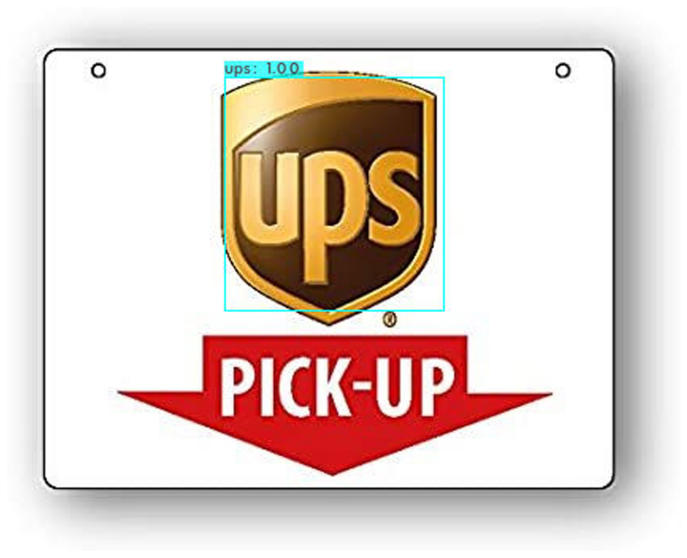

In [ ]:
# looking at the output
imShow('predictions.jpg')

In [ ]:
 !./darknet detector test data/obj.data cfg/yolov3_custom_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_custom2_lastest.weights /content/darknet/data/obj/0090f02cab.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

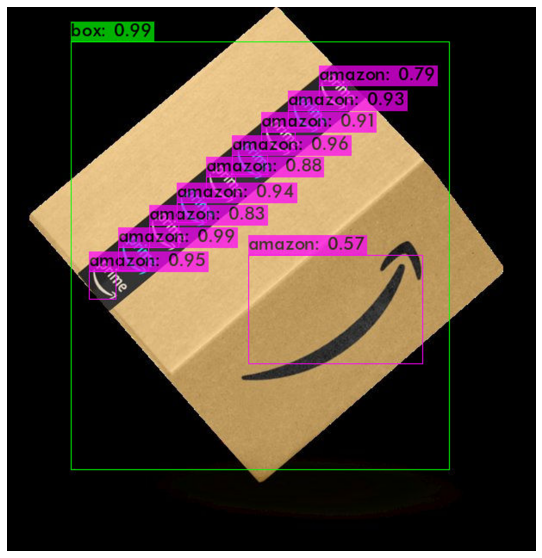

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_custom2_lastest.weights /content/darknet/data/obj/01c53361f1.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

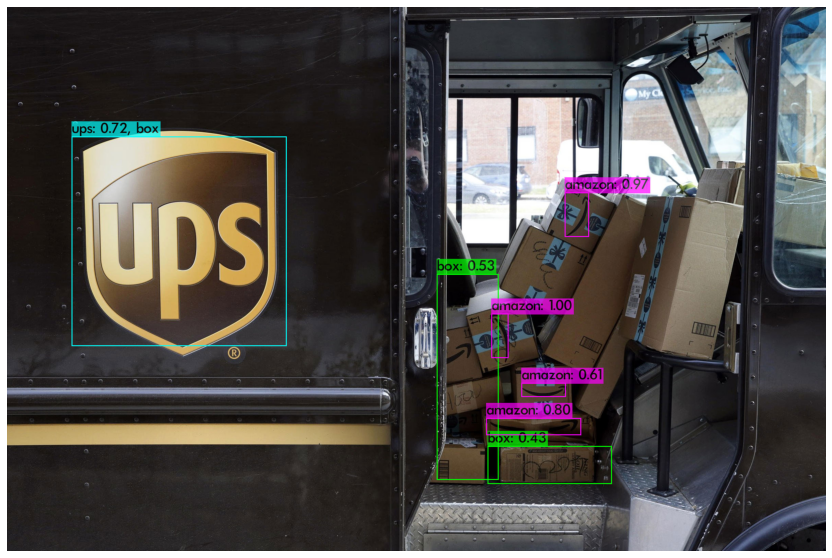

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_custom2_lastest.weights /content/darknet/data/obj/07be4f3426.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

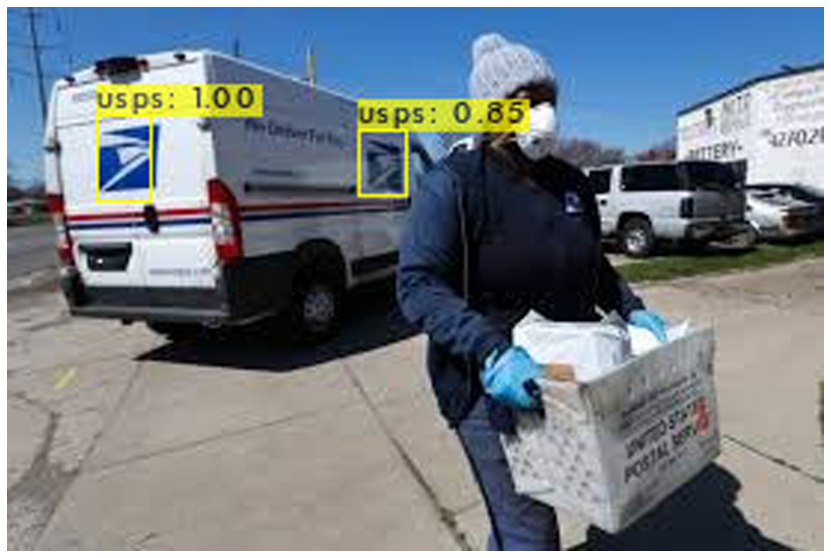

In [ ]:
imShow('predictions.jpg')